#K-means numeros aleatorios 

##Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline 

##Creamos unos arrays con numeros aleatorios 

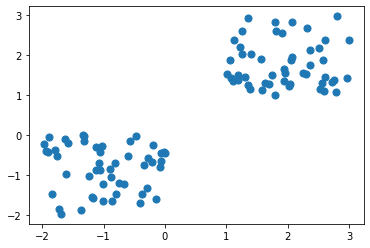

In [2]:
#array de 100x2
X=-2 * np.random.rand(100,2)
#Cambiamos datos de la columna 0 entre el 50 al 100 con datos lejanos
X[50:100,:]=1+(2 * np.random.rand(50,2))
#Generamos dos grupos (columna1 y columna2)
plt.scatter(X[:,0], X[:,1] , s=50)
plt.show()

###Creamos una instancia del algoritmo 

In [3]:
Kmean= KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

###Buscamos Centroides

In [4]:
centros=Kmean.cluster_centers_

###Dibujamos los centroides para cada clouster

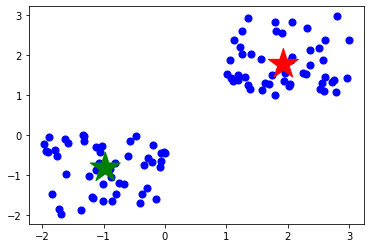

In [6]:
colores=['green','red']
plt.scatter(X[:,0],X[:,1], s=50, c='b')
plt.scatter(centros[:, 0], centros[:, 1], marker='*', c=colores, s=1000)
plt.show()

###Probando Algoritmo 

In [7]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

###Probando con datos manuales 

In [8]:
data_test=np.array([-3.0,-3.0]).reshape(1, -1)
Kmean.predict(data_test)

array([0], dtype=int32)

##K-means prestammos bancarios

###Importamos Librerias

In [9]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

###Importamos Dataset

In [10]:
df_bank = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/k-means-prestamos.csv")
df_bank.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


###Conociendo los Datos

In [11]:
df_bank.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


####Tomaremos sólo dos variables de los datos – "LoanAmount"/monto del prestamos y "ApplicantIncome"/ingresos del cliente

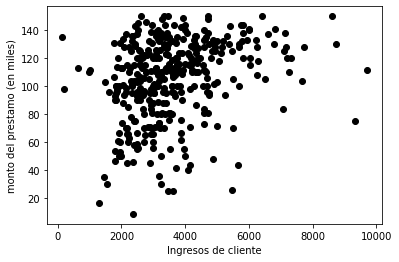

In [12]:
X = df_bank[["LoanAmount","ApplicantIncome"]]
#Visualizamos los datos
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('Ingresos de cliente')
plt.ylabel('monto del prestamo (en miles)')
plt.show()

###Buscando Centroides

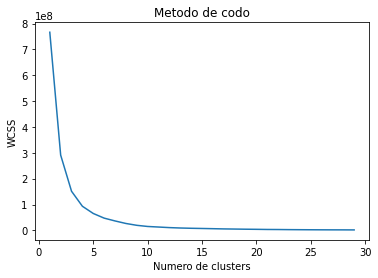

In [13]:
#WCSS es la suma de cuadrados de las distancias
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
print(centroids)
print(labels)

[[ 103.7972028  3332.02097902]
 [ 119.66666667 7712.13333333]
 [  95.96581197 2196.5042735 ]
 [ 119.25806452 5805.61290323]
 [ 112.49333333 4463.93333333]]
[4 0 2 3 2 0 2 2 2 4 0 0 4 2 1 2 0 0 4 2 0 0 4 0 2 0 0 0 2 2 4 4 0 3 3 2 4
 2 0 4 4 2 2 0 0 2 0 4 0 1 4 2 0 4 0 2 0 0 4 2 0 2 0 0 4 0 2 2 4 2 4 0 1 2
 3 0 4 2 4 2 0 0 2 2 0 4 4 0 4 2 2 2 4 3 2 0 0 2 0 1 4 2 2 2 0 4 0 2 0 2 2
 4 0 2 2 4 0 4 2 0 2 0 4 4 0 4 2 0 0 3 0 0 2 0 4 4 2 4 0 3 4 2 0 0 0 0 0 0
 3 2 3 0 3 1 3 0 2 0 2 3 3 4 2 1 3 4 0 0 0 0 2 4 2 0 4 4 2 2 0 2 0 4 0 4 0
 3 4 4 2 2 0 4 2 4 0 2 0 0 2 3 0 0 2 0 2 4 0 4 4 2 4 0 0 3 4 2 0 2 0 2 3 2
 0 0 0 4 4 0 1 3 2 4 0 2 4 1 4 0 3 0 1 4 0 2 2 3 2 2 0 0 0 0 4 2 0 2 2 2 4
 2 2 0 2 0 2 0 3 2 2 1 2 4 3 0 2 1 3 2 0 2 1 4 0 4 0 0 2 2 4 2 1 0 4 4 1 3
 4 3 0 2 4 2 4 2 0 0 2 2 0 2 2 0 0 0 2 4 0 2 0 4 0 0 0 0 2 0 2 0 0 2 2 3 0
 2 1 4 0 2 0 0 4 2 0 2 0 0 2 4 0 0 3 2 0 3 4 0 0 2 0 3 0 0 0 2 2 0 2 0 2 2
 4 2 0 0 0 0 3 0 0 4 4]


###Graficando Graficos y Centroides 

In [15]:
colores=['blue','red','green','yellow','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

[103.7972028  119.66666667  95.96581197 119.25806452 112.49333333]


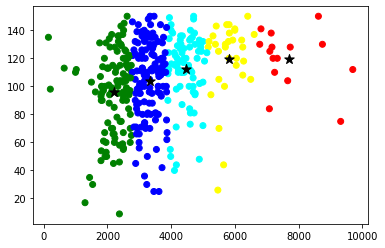

In [16]:
print(centroids[:, 0])
# mostramos grupos según Openess y Extraversion 
f1 = df_bank['ApplicantIncome'].values
f2 = df_bank['LoanAmount'].values
 
plt.scatter(f1, f2, c=asignar)
#
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=100)
plt.show()

###Resultados en Tablas 

In [17]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_bank.index.values
df_cluster['data_index']= df_bank.Education
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,Graduate,4
1,Graduate,0
2,Not Graduate,2
3,Graduate,3
4,Not Graduate,2


In [19]:
df_cluster[df_cluster.cluster == 4]

,data_index,cluster
0,Graduate,4
9,Graduate,4
12,Not Graduate,4
18,Not Graduate,4
22,Graduate,4
...,...,...
347,Graduate,4
354,Not Graduate,4
370,Graduate,4
379,Graduate,4


##K-means psicologia 

###Importamos Librerias

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

###Impoortamos DataSet

In [21]:
df_psico = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/k-means-psicologia.csv")
df_psico.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


###Conocemos los Datos

In [22]:
df_psico.describe()
df_psico.isnull().sum()

usuario      0
op           0
co           0
ex           0
ag           0
ne           0
wordcount    0
categoria    0
dtype: int64

###Graficamos

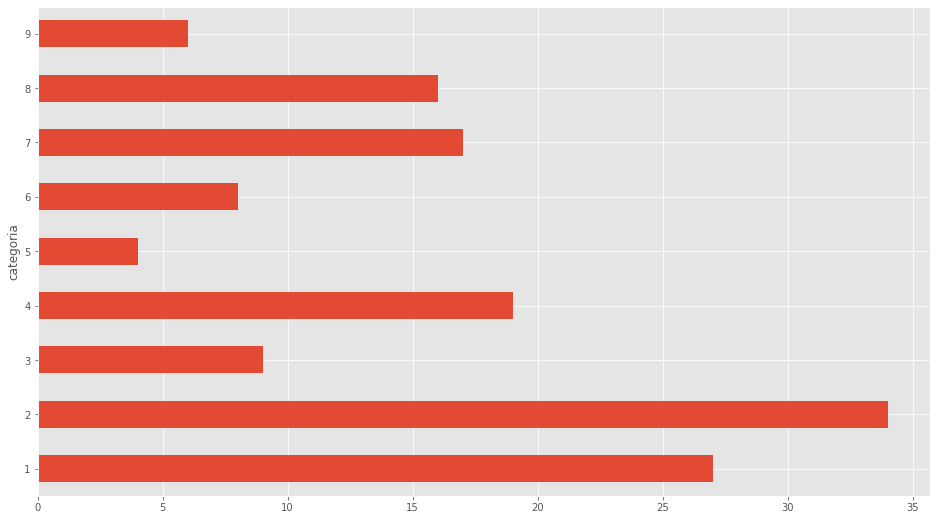

In [23]:
df_psico.groupby('categoria').size().plot.barh()

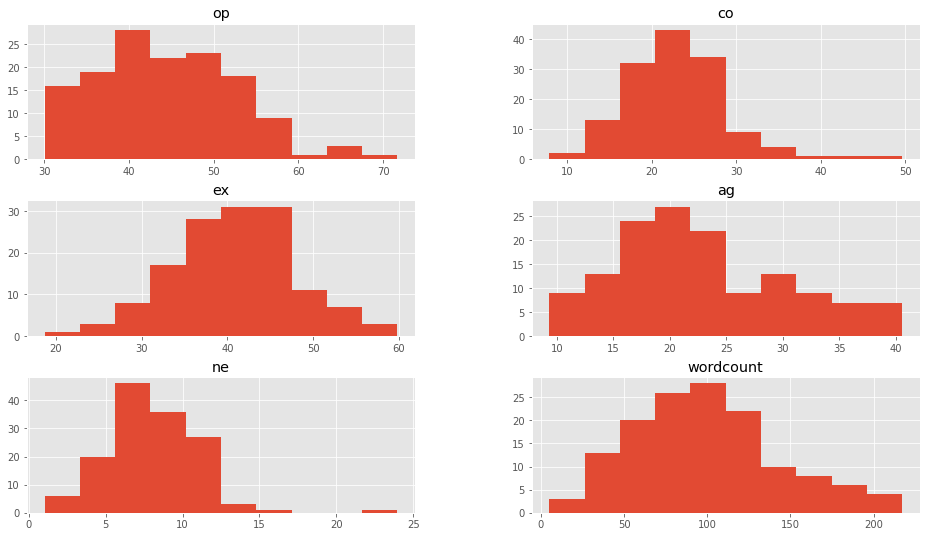

In [24]:
#Dispersión de los mismos datos
df_psico.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


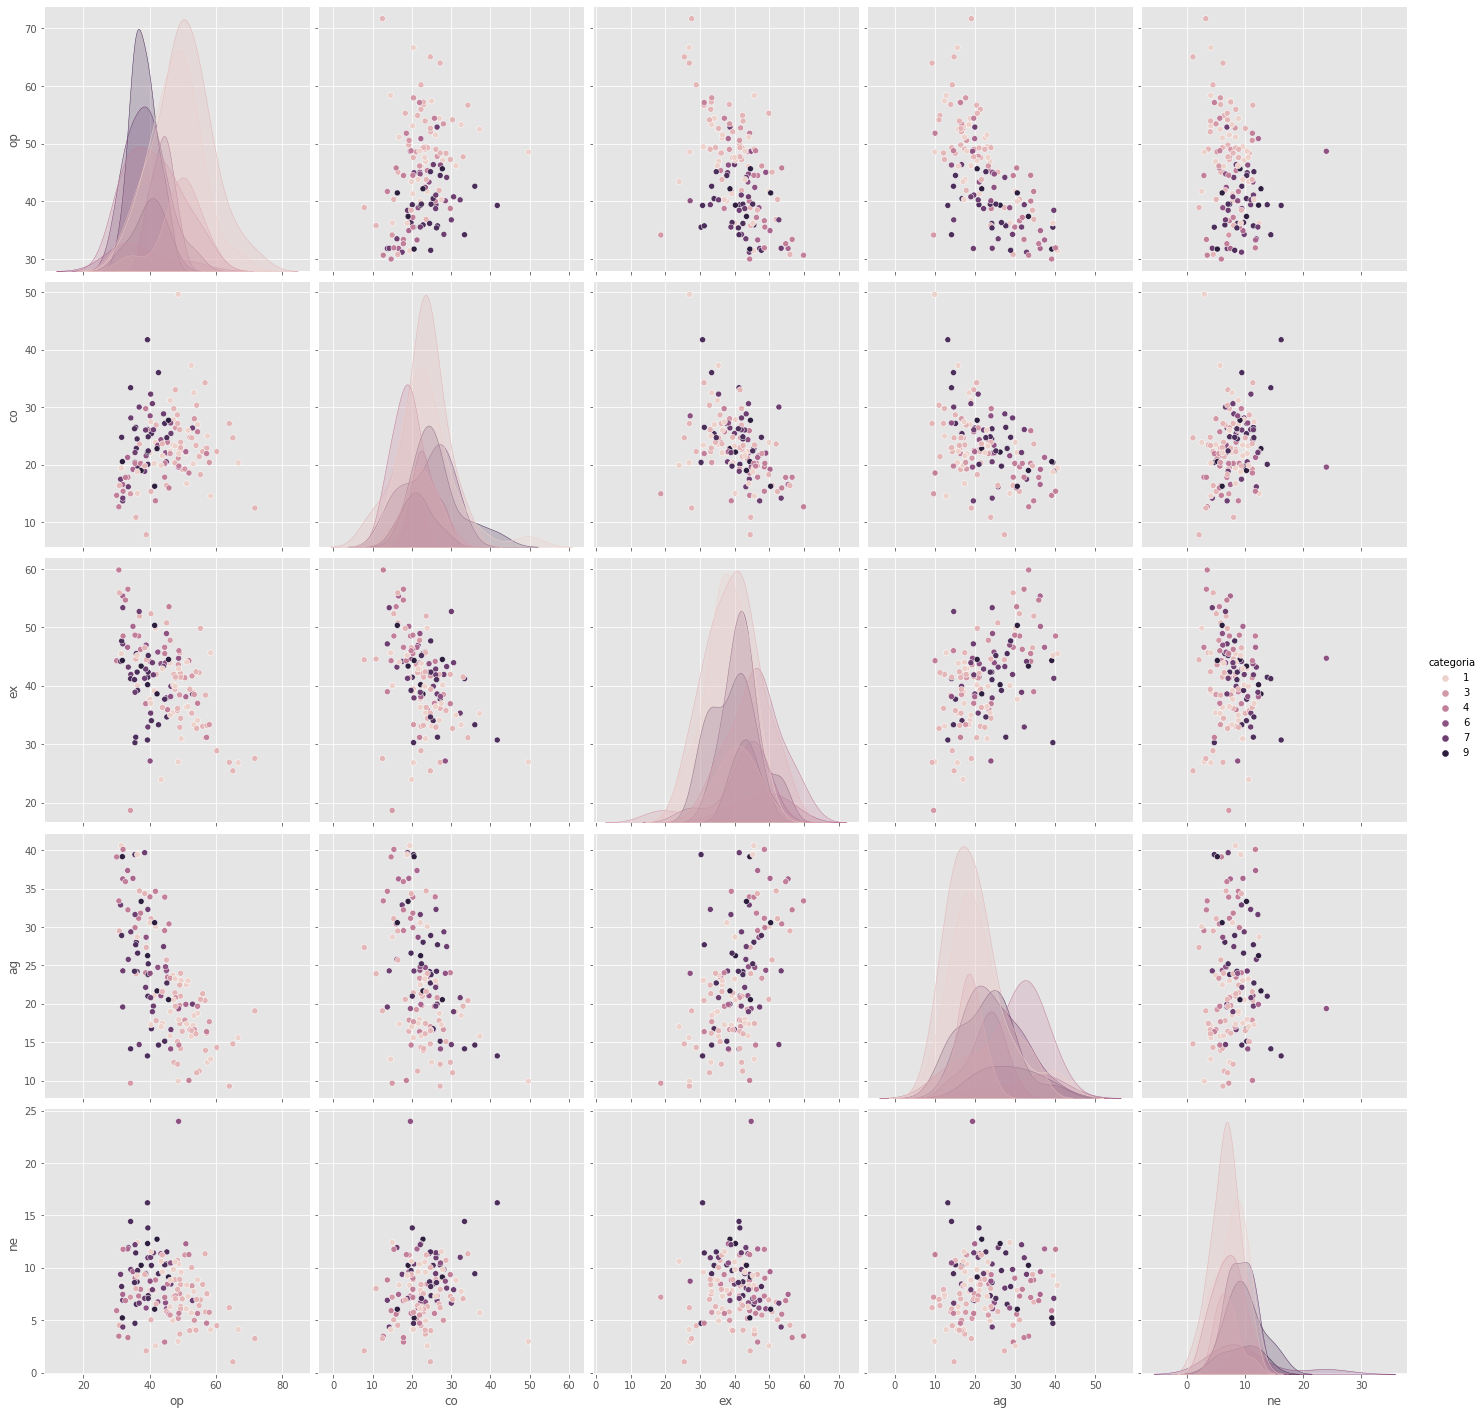

In [31]:
#graficos de relaciones en pares en el dataset.
#hue= variación de colores dependiendo del valor de la variable
sb.pairplot(df_psico, hue='categoria',size=4,vars=["op","co","ex","ag","ne"],kind='scatter')
#Revisando la gráfica no pareciera que hay algún tipo de agrupación o correlación entre los usuarios y sus categorías.

###Separamos datos(X y Y)

In [51]:
X = np.array(df_psico[["op","co","ex","ag","ne"]])
y = np.array(df_psico['categoria'])
#forma de la matriz
X.shape

(140, 5)

###Graficamos los valores de X en un grafico 3D

['black', 'black', 'cyan', 'green', 'cyan', 'black', 'black', 'yellow', 'black', 'black', 'blue', 'red', 'red', 'green', 'pink', 'blue', 'cyan', 'orange', 'green', 'cyan', 'green', 'blue', 'blue', 'black', 'green', 'cyan', 'pink', 'red', 'cyan', 'blue', 'pink', 'red', 'green', 'black', 'cyan', 'yellow', 'red', 'green', 'green', 'red', 'orange', 'green', 'orange', 'red', 'red', 'green', 'orange', 'blue', 'red', 'black', 'green', 'pink', 'orange', 'green', 'pink', 'green', 'red', 'blue', 'pink', 'green', 'pink', 'cyan', 'green', 'red', 'pink', 'brown', 'red', 'red', 'green', 'cyan', 'orange', 'pink', 'pink', 'cyan', 'brown', 'green', 'pink', 'cyan', 'cyan', 'brown', 'yellow', 'green', 'cyan', 'red', 'green', 'black', 'green', 'blue', 'green', 'red', 'green', 'black', 'green', 'green', 'red', 'black', 'black', 'green', 'cyan', 'orange', 'red', 'red', 'red', 'cyan', 'green', 'cyan', 'green', 'pink', 'black', 'yellow', 'brown', 'brown', 'pink', 'brown', 'black', 'red', 'pink', 'green', 'cya

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


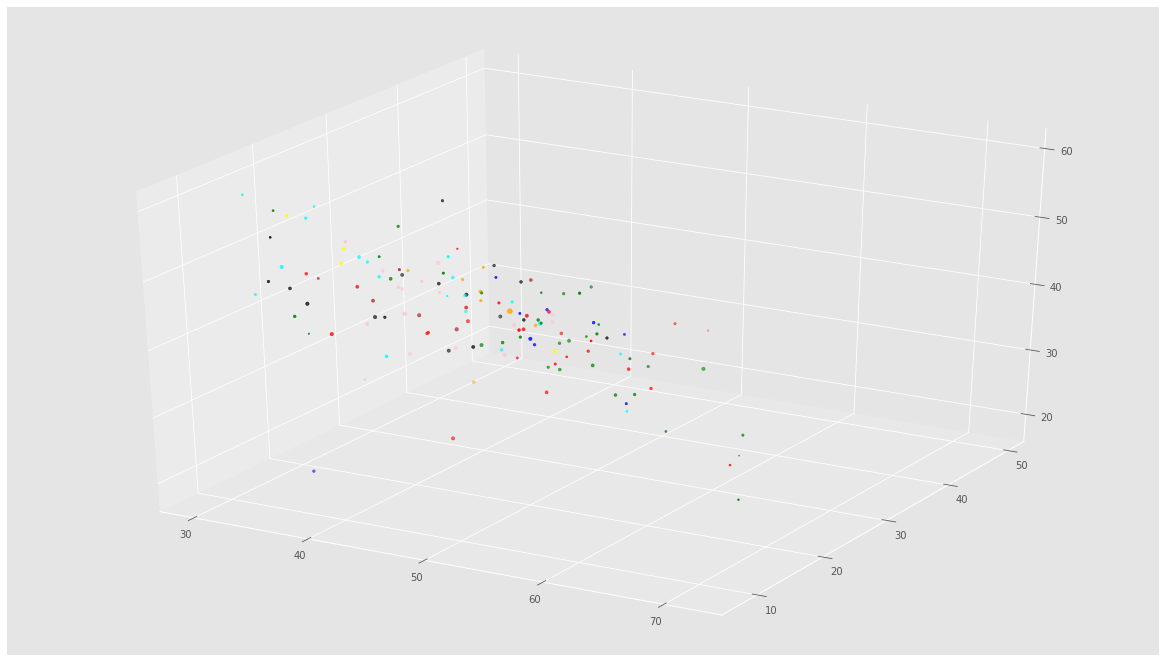

In [53]:
fig = plt.figure()
ax = Axes3D(fig)
#10 categorias / 10 colores
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
print(asignar)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], X[:, 3],X[:, 4], c=asignar)

###Encontramos el total de clouters (agrupamientos) idoneo 

Se utiliza el metodo de codo

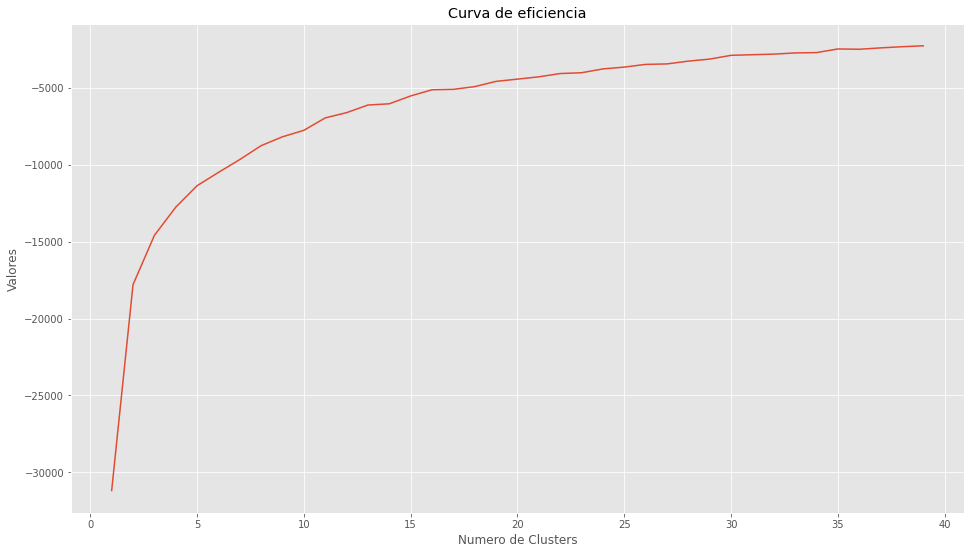

In [34]:
Nc = range(1, 40)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

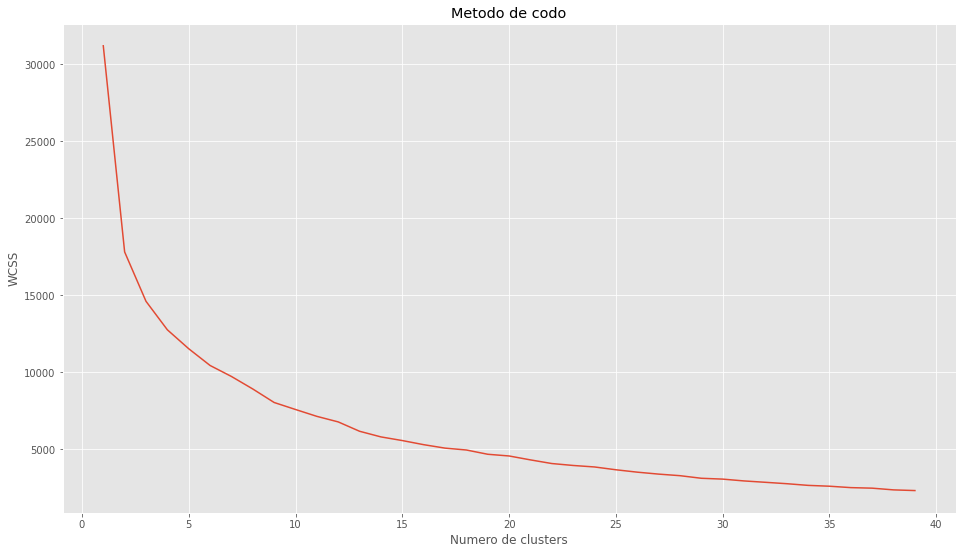

In [37]:
wcss = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=49)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 40), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

###Conocemos Centroides 

In [54]:
kmeans = KMeans(n_clusters=10).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[35.21619653 19.1241282  43.49559687 36.7916406   8.83286887]
 [39.7485556  26.5218316  39.77831272 22.10879528 10.01905888]
 [61.93625244 21.92653989 29.62719367 15.08910133  4.93914989]
 [39.57800033 19.06761904 46.185471   27.65273396  6.92633021]
 [51.1038389  20.93737986 43.01258457 16.41336224  7.65398305]
 [49.91489208 30.56886533 36.44625167 15.83987058  8.2765765 ]
 [49.51359333 24.21729648 36.69848595 21.3279799   8.48055567]
 [33.58327125 16.82258137 54.99926425 32.16846913  5.22165538]
 [43.515365   42.46817433 30.358012   12.60759133  9.538579  ]
 [38.81528    17.4348775  21.3382215  13.3573675   8.9133485 ]]


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


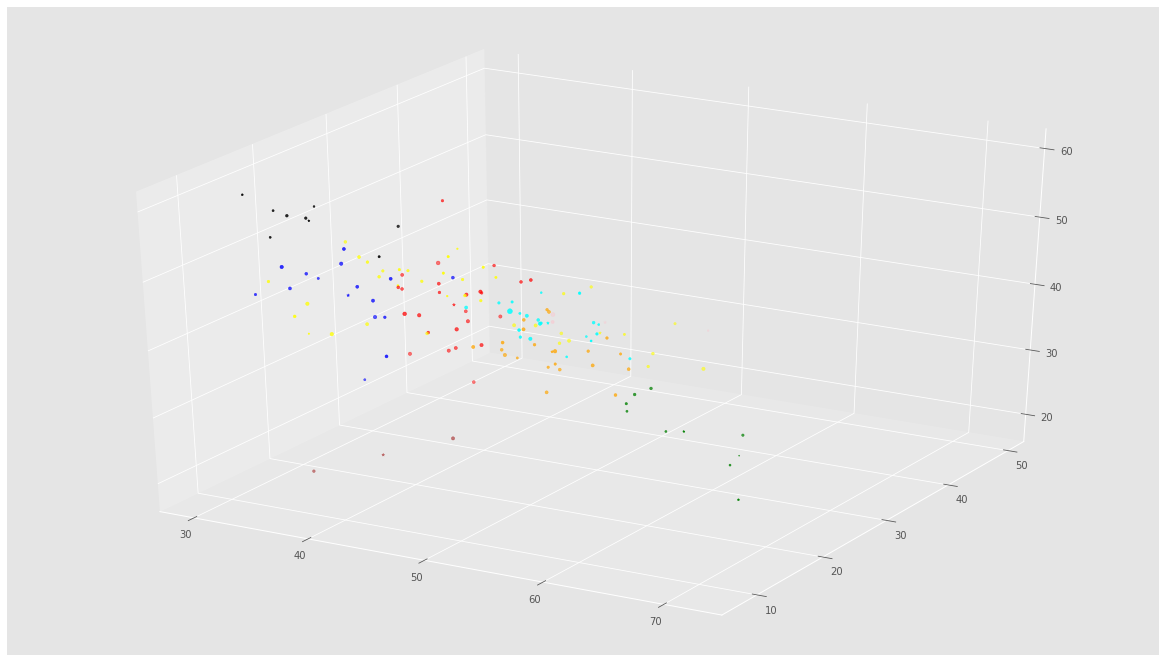

In [56]:
#3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan','yellow','orange','black','pink','brown'] #,'yellow','orange','black','pink','brown']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4], c=asignar)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], C[:, 3], C[:, 4], marker='*', c=colores)

###Visualiizacion en 2D

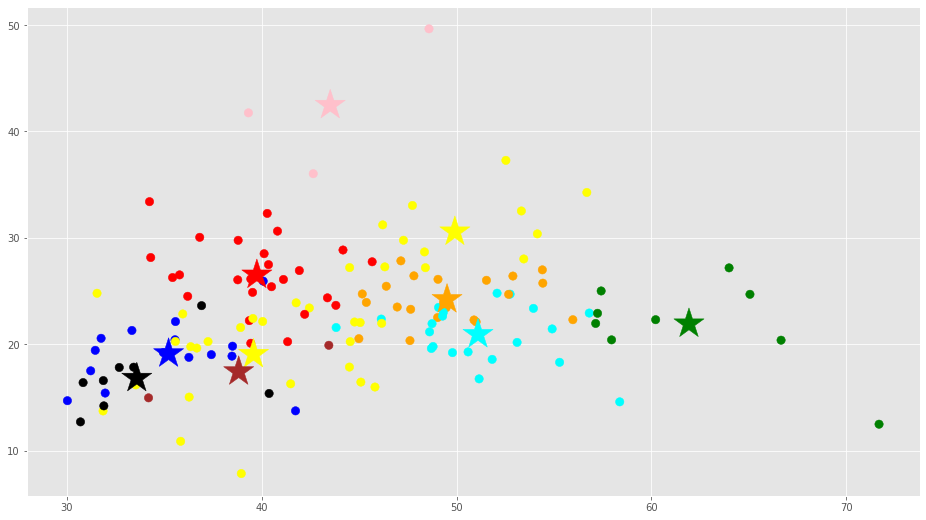

In [57]:
# mostramos grupos según Openess y Extraversion 
f1 = df_psico['op'].values
f2 = df_psico['co'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:,0 ], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

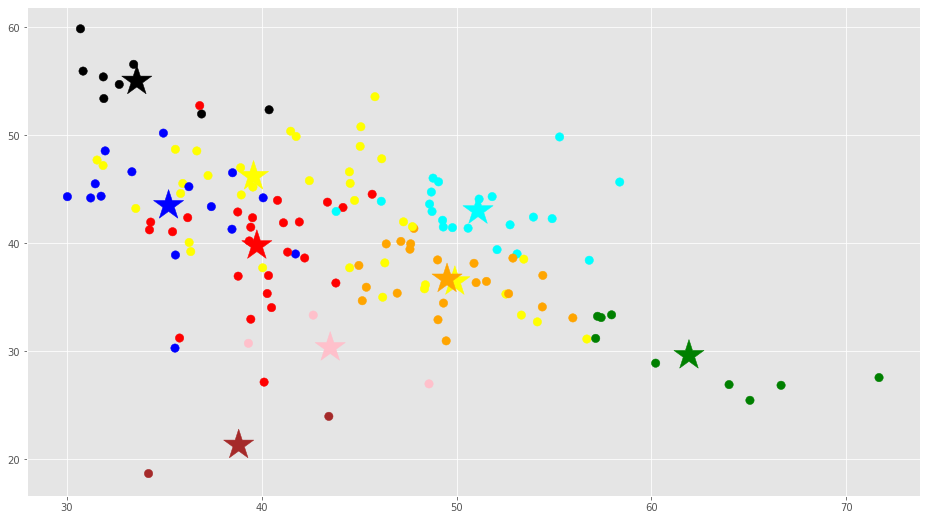

In [58]:
f1 = df_psico['op'].values
f2 = df_psico['ex'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

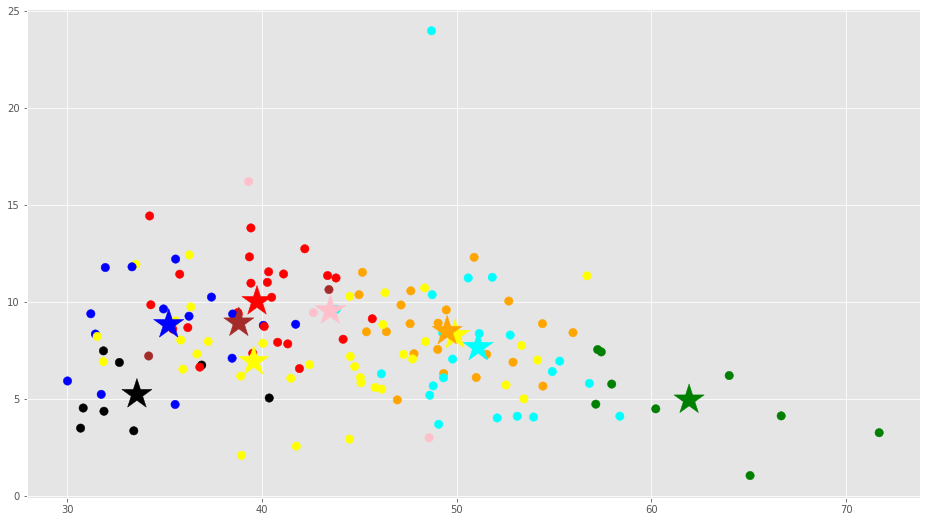

In [59]:
f1 = df_psico['op'].values
f2 = df_psico['ne'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 4], marker='*', c=colores, s=1000)
plt.show()

###Ver resultados en tabla 

In [60]:
copy =  pd.DataFrame()
copy['usuario']=df_psico['usuario'].values
copy['categoria']=df_psico['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,15
1,red,25
2,green,9
3,yellow,24
4,cyan,21
5,yellow,12
6,orange,21
7,black,8
8,pink,3
9,brown,2


###Diversidad por categorias laborales 

In [61]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,2.0
2,2,1.0
3,3,NaN
4,4,4.0
5,5,2.0
6,6,NaN
7,7,3.0
8,8,1.0
9,9,2.0


###Usuarios ccon rasgos de personalidad mas similares

In [62]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_psico.index.values
df_cluster['data_index']= df_psico.usuario
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,3gerardpique,1
1,aguerosergiokun,6
2,albertochicote,0
3,AlejandroSanz,7
4,alfredocasero1,3


In [ ]:
df_cluster[df_cluster.cluster == 4]

,data_index,cluster
0,3gerardpique,4
2,albertochicote,4
3,AlejandroSanz,4
4,alfredocasero1,4
7,andykusnetzoff,4
16,Berto_Romero,4
19,Buenafuente,4
20,CarlosAuryn,4
23,CasillasWorld,4
34,CristiPedroche,4


###Usuarios mas relevanttes en cada clouster 

In [63]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=df_psico['usuario'].values
for row in closest:
    print(users[row])

_josecoronado_
lorenzo99
foofighters
fieritacatalano
britneyspears
katyperry
CindyCrawford
jordiGlez
jiminhofe
SSantiagosegura
